In [1]:
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef,roc_auc_score
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support
import random
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn import svm,tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb


In [2]:
AllPerformace = []

In [3]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\cnv.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['cnv', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.76
Average Cross-Validation Precision: 0.58
Average Cross-Validation Recall: 0.54
Average Cross-Validation AUC-ROC: 0.45
Average Cross-Validation F1-Score: 0.52
Average Cross-Validation MCC-Score: 0.12


In [4]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\snv.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['snv', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.76
Average Cross-Validation Precision: 0.38
Average Cross-Validation Recall: 0.50
Average Cross-Validation AUC-ROC: 0.50
Average Cross-Validation F1-Score: 0.43
Average Cross-Validation MCC-Score: -0.02


In [5]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\meth.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['meth', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.84
Average Cross-Validation Precision: 0.80
Average Cross-Validation Recall: 0.74
Average Cross-Validation AUC-ROC: 0.67
Average Cross-Validation F1-Score: 0.75
Average Cross-Validation MCC-Score: 0.53


In [6]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\mRNA.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['mRNA', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.84
Average Cross-Validation Precision: 0.80
Average Cross-Validation Recall: 0.72
Average Cross-Validation AUC-ROC: 0.73
Average Cross-Validation F1-Score: 0.74
Average Cross-Validation MCC-Score: 0.51


In [7]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\miRNA.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['miRNA', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.74
Average Cross-Validation Precision: 0.61
Average Cross-Validation Recall: 0.58
Average Cross-Validation AUC-ROC: 0.68
Average Cross-Validation F1-Score: 0.58
Average Cross-Validation MCC-Score: 0.19


In [8]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['rppa', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.77
Average Cross-Validation Precision: 0.68
Average Cross-Validation Recall: 0.62
Average Cross-Validation AUC-ROC: 0.67
Average Cross-Validation F1-Score: 0.62
Average Cross-Validation MCC-Score: 0.29


In [9]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\cnv_snv.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['cnv_snv', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.76
Average Cross-Validation Precision: 0.55
Average Cross-Validation Recall: 0.53
Average Cross-Validation AUC-ROC: 0.48
Average Cross-Validation F1-Score: 0.50
Average Cross-Validation MCC-Score: 0.09


In [10]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\cnv_meth.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['cnv_meth', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.85
Average Cross-Validation Precision: 0.82
Average Cross-Validation Recall: 0.73
Average Cross-Validation AUC-ROC: 0.67
Average Cross-Validation F1-Score: 0.75
Average Cross-Validation MCC-Score: 0.54


In [11]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\cnv_mRNA.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['cnv_mRNA', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.81
Average Cross-Validation Precision: 0.73
Average Cross-Validation Recall: 0.67
Average Cross-Validation AUC-ROC: 0.75
Average Cross-Validation F1-Score: 0.68
Average Cross-Validation MCC-Score: 0.39


In [12]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\cnv_miRNA.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['cnv_miRNA', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.75
Average Cross-Validation Precision: 0.59
Average Cross-Validation Recall: 0.57
Average Cross-Validation AUC-ROC: 0.51
Average Cross-Validation F1-Score: 0.56
Average Cross-Validation MCC-Score: 0.15


In [13]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\cnv_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['cnv_rppa', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.78
Average Cross-Validation Precision: 0.69
Average Cross-Validation Recall: 0.62
Average Cross-Validation AUC-ROC: 0.67
Average Cross-Validation F1-Score: 0.63
Average Cross-Validation MCC-Score: 0.30


In [14]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\snv_meth.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['snv_meth', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.84
Average Cross-Validation Precision: 0.79
Average Cross-Validation Recall: 0.74
Average Cross-Validation AUC-ROC: 0.67
Average Cross-Validation F1-Score: 0.74
Average Cross-Validation MCC-Score: 0.52


In [15]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\snv_mRNA.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['snv_mRNA', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.83
Average Cross-Validation Precision: 0.80
Average Cross-Validation Recall: 0.70
Average Cross-Validation AUC-ROC: 0.75
Average Cross-Validation F1-Score: 0.72
Average Cross-Validation MCC-Score: 0.48


In [16]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\snv_miRNA.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['snv_miRNA', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.71
Average Cross-Validation Precision: 0.60
Average Cross-Validation Recall: 0.58
Average Cross-Validation AUC-ROC: 0.70
Average Cross-Validation F1-Score: 0.57
Average Cross-Validation MCC-Score: 0.18


In [17]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\snv_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['snv_rppa', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.75
Average Cross-Validation Precision: 0.63
Average Cross-Validation Recall: 0.59
Average Cross-Validation AUC-ROC: 0.75
Average Cross-Validation F1-Score: 0.60
Average Cross-Validation MCC-Score: 0.22


In [18]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\meth_mRNA.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['meth_mRNA', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.81
Average Cross-Validation Precision: 0.75
Average Cross-Validation Recall: 0.68
Average Cross-Validation AUC-ROC: 0.64
Average Cross-Validation F1-Score: 0.69
Average Cross-Validation MCC-Score: 0.42


In [19]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\meth_miRNA.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['meth_miRNA', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.86
Average Cross-Validation Precision: 0.87
Average Cross-Validation Recall: 0.75
Average Cross-Validation AUC-ROC: 0.67
Average Cross-Validation F1-Score: 0.77
Average Cross-Validation MCC-Score: 0.59


In [20]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\meth_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['meth_rppa', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.86
Average Cross-Validation Precision: 0.87
Average Cross-Validation Recall: 0.75
Average Cross-Validation AUC-ROC: 0.67
Average Cross-Validation F1-Score: 0.77
Average Cross-Validation MCC-Score: 0.59


In [21]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\mRNA_miRNA.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['mRNA_miRNA', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.84
Average Cross-Validation Precision: 0.78
Average Cross-Validation Recall: 0.71
Average Cross-Validation AUC-ROC: 0.75
Average Cross-Validation F1-Score: 0.73
Average Cross-Validation MCC-Score: 0.48


In [22]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\mRNA_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['mRNA_rppa', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.84
Average Cross-Validation Precision: 0.81
Average Cross-Validation Recall: 0.71
Average Cross-Validation AUC-ROC: 0.75
Average Cross-Validation F1-Score: 0.73
Average Cross-Validation MCC-Score: 0.50


In [23]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\miRNA_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['miRNA_rppa', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.78
Average Cross-Validation Precision: 0.71
Average Cross-Validation Recall: 0.64
Average Cross-Validation AUC-ROC: 0.67
Average Cross-Validation F1-Score: 0.65
Average Cross-Validation MCC-Score: 0.33


In [24]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\cnv_snv_meth.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['cnv_snv_meth', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.86
Average Cross-Validation Precision: 0.83
Average Cross-Validation Recall: 0.76
Average Cross-Validation AUC-ROC: 0.75
Average Cross-Validation F1-Score: 0.78
Average Cross-Validation MCC-Score: 0.58


In [25]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\cnv_snv_mRNA.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['cnv_snv_mRNA', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.81
Average Cross-Validation Precision: 0.71
Average Cross-Validation Recall: 0.67
Average Cross-Validation AUC-ROC: 0.70
Average Cross-Validation F1-Score: 0.67
Average Cross-Validation MCC-Score: 0.37


In [26]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\cnv_snv_miRNA.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['cnv_snv_miRNA', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.75
Average Cross-Validation Precision: 0.63
Average Cross-Validation Recall: 0.61
Average Cross-Validation AUC-ROC: 0.68
Average Cross-Validation F1-Score: 0.61
Average Cross-Validation MCC-Score: 0.24


In [27]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\cnv_snv_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['cnv_snv_rppa', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.74
Average Cross-Validation Precision: 0.62
Average Cross-Validation Recall: 0.59
Average Cross-Validation AUC-ROC: 0.75
Average Cross-Validation F1-Score: 0.60
Average Cross-Validation MCC-Score: 0.21


In [28]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\cnv_meth_mRNA.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['cnv_meth_mRNA', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.80
Average Cross-Validation Precision: 0.74
Average Cross-Validation Recall: 0.66
Average Cross-Validation AUC-ROC: 0.64
Average Cross-Validation F1-Score: 0.67
Average Cross-Validation MCC-Score: 0.38


In [29]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\cnv_meth_miRNA.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['cnv_meth_miRNA', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.84
Average Cross-Validation Precision: 0.81
Average Cross-Validation Recall: 0.73
Average Cross-Validation AUC-ROC: 0.67
Average Cross-Validation F1-Score: 0.75
Average Cross-Validation MCC-Score: 0.54


In [30]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\cnv_meth_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['cnv_meth_rppa', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.86
Average Cross-Validation Precision: 0.86
Average Cross-Validation Recall: 0.75
Average Cross-Validation AUC-ROC: 0.67
Average Cross-Validation F1-Score: 0.76
Average Cross-Validation MCC-Score: 0.59


In [31]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\cnv_mRNA_miRNA.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['cnv_mRNA_miRNA', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.81
Average Cross-Validation Precision: 0.76
Average Cross-Validation Recall: 0.67
Average Cross-Validation AUC-ROC: 0.75
Average Cross-Validation F1-Score: 0.68
Average Cross-Validation MCC-Score: 0.41


In [32]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\cnv_mRNA_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['cnv_mRNA_rppa', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.82
Average Cross-Validation Precision: 0.76
Average Cross-Validation Recall: 0.68
Average Cross-Validation AUC-ROC: 0.75
Average Cross-Validation F1-Score: 0.70
Average Cross-Validation MCC-Score: 0.43


In [33]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\cnv_miRNA_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['cnv_miRNA_rppa', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.78
Average Cross-Validation Precision: 0.68
Average Cross-Validation Recall: 0.63
Average Cross-Validation AUC-ROC: 0.75
Average Cross-Validation F1-Score: 0.63
Average Cross-Validation MCC-Score: 0.30


In [34]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\snv_meth_mRNA.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['snv_meth_mRNA', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.86
Average Cross-Validation Precision: 0.83
Average Cross-Validation Recall: 0.77
Average Cross-Validation AUC-ROC: 0.67
Average Cross-Validation F1-Score: 0.78
Average Cross-Validation MCC-Score: 0.59


In [35]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\snv_meth_miRNA.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['snv_meth_miRNA', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.86
Average Cross-Validation Precision: 0.82
Average Cross-Validation Recall: 0.77
Average Cross-Validation AUC-ROC: 0.67
Average Cross-Validation F1-Score: 0.78
Average Cross-Validation MCC-Score: 0.58


In [36]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\snv_meth_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['snv_meth_rppa', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.87
Average Cross-Validation Precision: 0.87
Average Cross-Validation Recall: 0.75
Average Cross-Validation AUC-ROC: 0.75
Average Cross-Validation F1-Score: 0.78
Average Cross-Validation MCC-Score: 0.60


In [37]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\snv_mRNA_miRNA.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['snv_mRNA_miRNA', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.81
Average Cross-Validation Precision: 0.74
Average Cross-Validation Recall: 0.68
Average Cross-Validation AUC-ROC: 0.73
Average Cross-Validation F1-Score: 0.69
Average Cross-Validation MCC-Score: 0.40


In [38]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\snv_mRNA_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['snv_mRNA_rppa', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.82
Average Cross-Validation Precision: 0.78
Average Cross-Validation Recall: 0.68
Average Cross-Validation AUC-ROC: 0.75
Average Cross-Validation F1-Score: 0.70
Average Cross-Validation MCC-Score: 0.44


In [39]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\snv_miRNA_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['snv_miRNA_rppa', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.74
Average Cross-Validation Precision: 0.60
Average Cross-Validation Recall: 0.59
Average Cross-Validation AUC-ROC: 0.70
Average Cross-Validation F1-Score: 0.59
Average Cross-Validation MCC-Score: 0.19


In [40]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\meth_mRNA_miRNA.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['meth_mRNA_miRNA', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.82
Average Cross-Validation Precision: 0.77
Average Cross-Validation Recall: 0.69
Average Cross-Validation AUC-ROC: 0.64
Average Cross-Validation F1-Score: 0.70
Average Cross-Validation MCC-Score: 0.44


In [41]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\meth_mRNA_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['meth_mRNA_rppa', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.84
Average Cross-Validation Precision: 0.80
Average Cross-Validation Recall: 0.69
Average Cross-Validation AUC-ROC: 0.64
Average Cross-Validation F1-Score: 0.71
Average Cross-Validation MCC-Score: 0.47


In [42]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\meth_miRNA_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['meth_miRNA_rppa', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.88
Average Cross-Validation Precision: 0.85
Average Cross-Validation Recall: 0.77
Average Cross-Validation AUC-ROC: 0.67
Average Cross-Validation F1-Score: 0.79
Average Cross-Validation MCC-Score: 0.61


In [43]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\mRNA_miRNA_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['mRNA_miRNA_rppa', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.83
Average Cross-Validation Precision: 0.81
Average Cross-Validation Recall: 0.71
Average Cross-Validation AUC-ROC: 0.75
Average Cross-Validation F1-Score: 0.73
Average Cross-Validation MCC-Score: 0.50


In [44]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\cnv_snv_meth_mRNA.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['cnv_snv_meth_mRNA', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.85
Average Cross-Validation Precision: 0.81
Average Cross-Validation Recall: 0.76
Average Cross-Validation AUC-ROC: 0.64
Average Cross-Validation F1-Score: 0.76
Average Cross-Validation MCC-Score: 0.56


In [45]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\cnv_snv_meth_miRNA.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['cnv_snv_meth_miRNA', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.85
Average Cross-Validation Precision: 0.81
Average Cross-Validation Recall: 0.75
Average Cross-Validation AUC-ROC: 0.67
Average Cross-Validation F1-Score: 0.76
Average Cross-Validation MCC-Score: 0.55


In [46]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\cnv_snv_meth_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['cnv_snv_meth_rppa', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.86
Average Cross-Validation Precision: 0.83
Average Cross-Validation Recall: 0.74
Average Cross-Validation AUC-ROC: 0.75
Average Cross-Validation F1-Score: 0.76
Average Cross-Validation MCC-Score: 0.55


In [47]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\cnv_snv_mRNA_miRNA.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['cnv_snv_mRNA_miRNA', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.81
Average Cross-Validation Precision: 0.77
Average Cross-Validation Recall: 0.68
Average Cross-Validation AUC-ROC: 0.75
Average Cross-Validation F1-Score: 0.69
Average Cross-Validation MCC-Score: 0.42


In [48]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\cnv_snv_mRNA_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['cnv_snv_mRNA_rppa', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.81
Average Cross-Validation Precision: 0.75
Average Cross-Validation Recall: 0.67
Average Cross-Validation AUC-ROC: 0.75
Average Cross-Validation F1-Score: 0.69
Average Cross-Validation MCC-Score: 0.41


In [49]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\cnv_snv_miRNA_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['cnv_snv_miRNA_rppa', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.78
Average Cross-Validation Precision: 0.68
Average Cross-Validation Recall: 0.63
Average Cross-Validation AUC-ROC: 0.64
Average Cross-Validation F1-Score: 0.63
Average Cross-Validation MCC-Score: 0.30


In [50]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\cnv_meth_mRNA_miRNA.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['cnv_meth_mRNA_miRNA', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.80
Average Cross-Validation Precision: 0.71
Average Cross-Validation Recall: 0.65
Average Cross-Validation AUC-ROC: 0.64
Average Cross-Validation F1-Score: 0.66
Average Cross-Validation MCC-Score: 0.36


In [51]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\cnv_meth_mRNA_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['cnv_meth_mRNA_rppa', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.83
Average Cross-Validation Precision: 0.79
Average Cross-Validation Recall: 0.68
Average Cross-Validation AUC-ROC: 0.56
Average Cross-Validation F1-Score: 0.70
Average Cross-Validation MCC-Score: 0.45


In [52]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\cnv_meth_miRNA_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['cnv_meth_miRNA_rppa', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.87
Average Cross-Validation Precision: 0.87
Average Cross-Validation Recall: 0.77
Average Cross-Validation AUC-ROC: 0.67
Average Cross-Validation F1-Score: 0.77
Average Cross-Validation MCC-Score: 0.60


In [53]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\cnv_mRNA_miRNA_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['cnv_mRNA_miRNA_rppa', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.80
Average Cross-Validation Precision: 0.73
Average Cross-Validation Recall: 0.66
Average Cross-Validation AUC-ROC: 0.75
Average Cross-Validation F1-Score: 0.68
Average Cross-Validation MCC-Score: 0.39


In [54]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\snv_meth_mRNA_miRNA.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['snv_meth_mRNA_miRNA', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.84
Average Cross-Validation Precision: 0.79
Average Cross-Validation Recall: 0.73
Average Cross-Validation AUC-ROC: 0.56
Average Cross-Validation F1-Score: 0.74
Average Cross-Validation MCC-Score: 0.51


In [55]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\snv_meth_mRNA_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['snv_meth_mRNA_rppa', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.83
Average Cross-Validation Precision: 0.78
Average Cross-Validation Recall: 0.69
Average Cross-Validation AUC-ROC: 0.64
Average Cross-Validation F1-Score: 0.71
Average Cross-Validation MCC-Score: 0.45


In [56]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\snv_meth_miRNA_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['snv_meth_miRNA_rppa', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.86
Average Cross-Validation Precision: 0.83
Average Cross-Validation Recall: 0.76
Average Cross-Validation AUC-ROC: 0.75
Average Cross-Validation F1-Score: 0.78
Average Cross-Validation MCC-Score: 0.59


In [57]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\snv_mRNA_miRNA_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['snv_mRNA_miRNA_rppa', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.82
Average Cross-Validation Precision: 0.77
Average Cross-Validation Recall: 0.68
Average Cross-Validation AUC-ROC: 0.75
Average Cross-Validation F1-Score: 0.69
Average Cross-Validation MCC-Score: 0.43


In [58]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\meth_mRNA_miRNA_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['meth_mRNA_miRNA_rppa', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.83
Average Cross-Validation Precision: 0.79
Average Cross-Validation Recall: 0.68
Average Cross-Validation AUC-ROC: 0.64
Average Cross-Validation F1-Score: 0.71
Average Cross-Validation MCC-Score: 0.45


In [59]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\cnv_snv_meth_mRNA_miRNA.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['cnv_snv_meth_mRNA_miRNA', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.85
Average Cross-Validation Precision: 0.80
Average Cross-Validation Recall: 0.74
Average Cross-Validation AUC-ROC: 0.56
Average Cross-Validation F1-Score: 0.76
Average Cross-Validation MCC-Score: 0.54


In [60]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\cnv_snv_meth_mRNA_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['cnv_snv_meth_mRNA_rppa', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.84
Average Cross-Validation Precision: 0.80
Average Cross-Validation Recall: 0.70
Average Cross-Validation AUC-ROC: 0.56
Average Cross-Validation F1-Score: 0.72
Average Cross-Validation MCC-Score: 0.49


In [61]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\cnv_snv_meth_miRNA_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['cnv_snv_meth_miRNA_rppa', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.86
Average Cross-Validation Precision: 0.87
Average Cross-Validation Recall: 0.76
Average Cross-Validation AUC-ROC: 0.67
Average Cross-Validation F1-Score: 0.77
Average Cross-Validation MCC-Score: 0.60


In [62]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\cnv_snv_mRNA_miRNA_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['cnv_snv_mRNA_miRNA_rppa', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.81
Average Cross-Validation Precision: 0.78
Average Cross-Validation Recall: 0.68
Average Cross-Validation AUC-ROC: 0.75
Average Cross-Validation F1-Score: 0.69
Average Cross-Validation MCC-Score: 0.43


In [63]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\cnv_meth_mRNA_miRNA_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['cnv_meth_mRNA_miRNA_rppa', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.84
Average Cross-Validation Precision: 0.83
Average Cross-Validation Recall: 0.71
Average Cross-Validation AUC-ROC: 0.73
Average Cross-Validation F1-Score: 0.73
Average Cross-Validation MCC-Score: 0.51


In [64]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\snv_meth_mRNA_miRNA_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['snv_meth_mRNA_miRNA_rppa', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.82
Average Cross-Validation Precision: 0.79
Average Cross-Validation Recall: 0.67
Average Cross-Validation AUC-ROC: 0.67
Average Cross-Validation F1-Score: 0.69
Average Cross-Validation MCC-Score: 0.44


In [65]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\binary\cnv_snv_meth_mRNA_miRNA_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
#oversample = SMOTE(random_state=0)
#X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,  max_depth=5,  n_estimators=5000,  subsample=0.5,  colsample_bytree=0.5,  eval_metric='auc',  verbosity=1, random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels, val_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['cnv_snv_meth_mRNA_miRNA_rppa', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.84
Average Cross-Validation Precision: 0.84
Average Cross-Validation Recall: 0.69
Average Cross-Validation AUC-ROC: 0.58
Average Cross-Validation F1-Score: 0.71
Average Cross-Validation MCC-Score: 0.49


In [66]:
AllPerformace = pd.DataFrame(AllPerformace,columns = ['Omic','Accuracy','AUC-ROC','Precision','Recall','F1','MCC'])

In [67]:
AllPerformace

,Omic,Accuracy,AUC-ROC,Precision,Recall,F1,MCC
0,cnv,0.756217,0.452381,0.578266,0.535714,0.517693,0.117912
1,snv,0.760185,0.500000,0.382840,0.495238,0.431791,-0.021594
2,meth,0.839550,0.666667,0.802398,0.737121,0.746725,0.526507
3,mRNA,0.843783,0.726190,0.802398,0.716883,0.735805,0.506704
4,miRNA,0.742593,0.678571,0.608458,0.584848,0.578452,0.186231
...,...,...,...,...,...,...,...
58,cnv_snv_meth_miRNA_rppa,0.864947,0.666667,0.865741,0.756277,0.772676,0.597434
59,cnv_snv_mRNA_miRNA_rppa,0.814550,0.750000,0.782558,0.676190,0.688634,0.434416
60,cnv_meth_mRNA_miRNA_rppa,0.844048,0.726190,0.826755,0.709740,0.732896,0.514416
61,snv_meth_mRNA_miRNA_rppa,0.821429,0.666667,0.792756,0.670455,0.689295,0.436590


In [68]:
AllPerformace.to_csv('63OmicsBinaryXGBoost.csv', index=False)


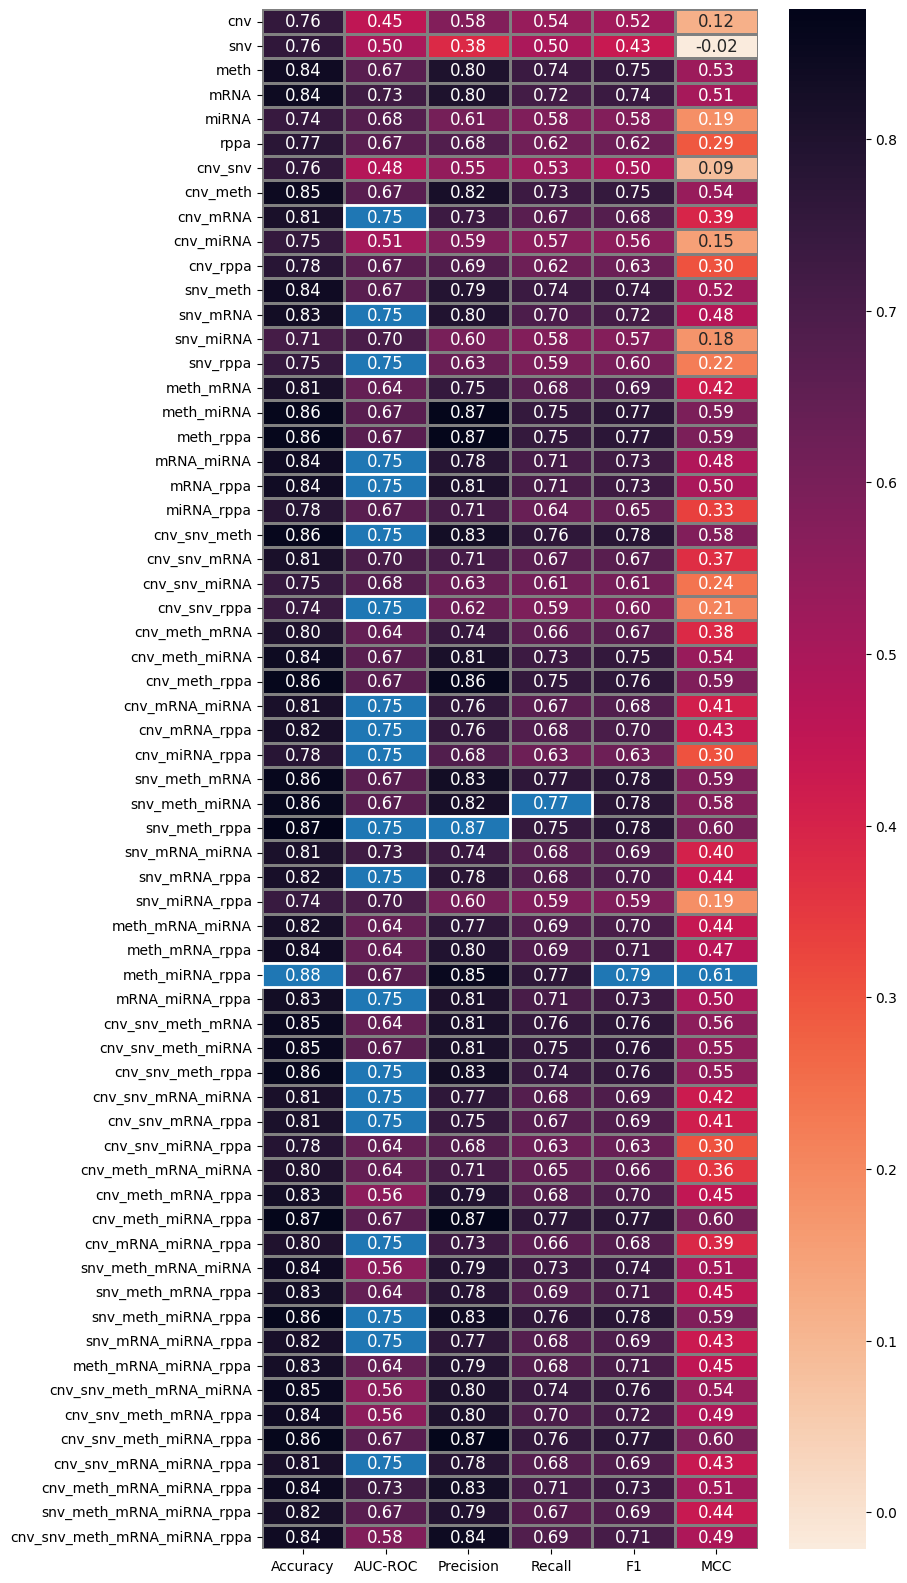

In [70]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,20
omics = AllPerformace.iloc[:,0]
AllPerformace = AllPerformace.iloc[:,1:11]
# Create a heatmap
ax = sns.heatmap(AllPerformace, 
            xticklabels=AllPerformace.columns, 
            yticklabels= omics,
            cmap='rocket_r',
            linewidth=1,
            linecolor='gray',
            annot=True,
            fmt=".2f",
            annot_kws={"size": 12}
           )


# Find and annotate all instances of the highest values with red rectangles
for i, col in enumerate(AllPerformace.columns):
    max_value = AllPerformace[col].max()
    row_indices = np.where(AllPerformace[col] == max_value)[0]
    for row_idx in row_indices:
        ax.add_patch(plt.Rectangle((i, row_idx), 1, 1, fill= 'blue', edgecolor='white', lw=2))
    

plt.savefig('63OmicsBinaryXGBoost.jpg',dpi=600,bbox_inches = 'tight')
plt.show()